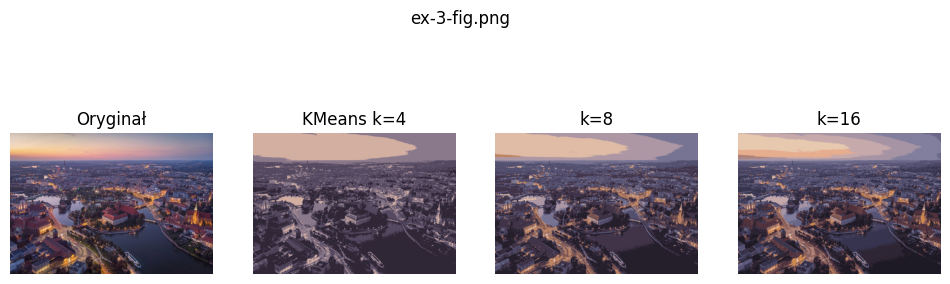

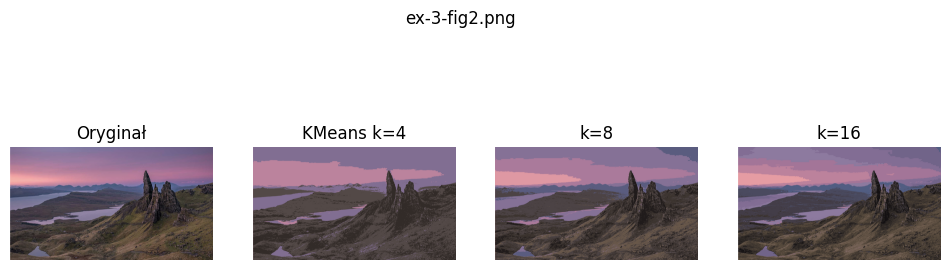

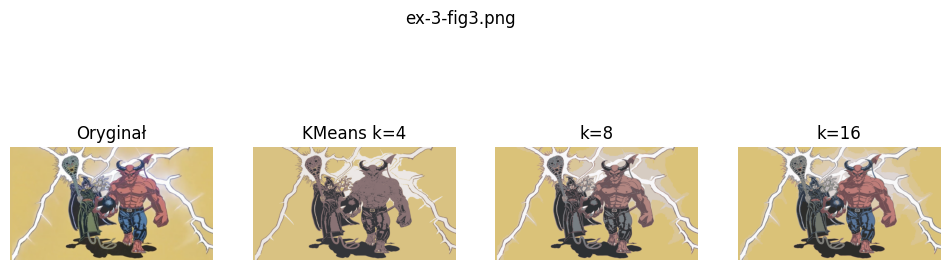

In [37]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def quantize_kmeans(img, k):
    arr = np.array(img)
    h, w, c = arr.shape
    pixels = arr.reshape(-1, 3)

    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    labels = kmeans.fit_predict(pixels)

    new_colors = kmeans.cluster_centers_.astype(np.uint8)
    quantized = new_colors[labels].reshape(h, w, 3)

    return Image.fromarray(quantized), new_colors

images = [
    "ex-3-fig.png",
    "ex-3-fig2.png",
    "ex-3-fig3.png"
]

for path in images:
    img = Image.open(path).convert("RGB")

    q4, _ = quantize_kmeans(img, 4)
    q8, _ = quantize_kmeans(img, 8)
    q16, _ = quantize_kmeans(img, 16)

    fig, ax = plt.subplots(1, 4, figsize=(12,4))
    ax[0].imshow(img)
    ax[0].set_title("Oryginał")

    ax[1].imshow(q4)
    ax[1].set_title("KMeans k=4")

    ax[2].imshow(q8)
    ax[2].set_title("k=8")

    ax[3].imshow(q16)
    ax[3].set_title("k=16")

    for a in ax:
        a.axis("off")

    plt.suptitle(path)
    plt.show()
